# Predicting User Knowledge Levels Through Study Habits and Exam Performance Analysis

#### Junseo Park Michaela Ahkong Teresa Yao Lia Sayers 

# 1. Splitting the data into a training and test set

In [1]:
import random  # Import the random module to generate random numbers.

import altair as alt  # Import Altair for declarative statistical visualization.
import pandas as pd  # Import pandas for data manipulation and analysis.
import numpy as np  # Import NumPy for numerical computing.

from sklearn import set_config  # Import set_config from sklearn to set global configuration.
from sklearn.compose import make_column_transformer  # Import make_column_transformer for creating a column transformer.
from sklearn.metrics.pairwise import euclidean_distances  # Import euclidean_distances to compute pairwise distances.
from sklearn.neighbors import KNeighborsClassifier  # Import KNeighborsClassifier for k-nearest neighbors classification.
from sklearn.pipeline import make_pipeline  # Import make_pipeline to construct a pipeline.
from sklearn.preprocessing import OneHotEncoder, StandardScaler  # Import OneHotEncoder for encoding categorical features as a one-hot numeric array, and StandardScaler for standardization by removing the mean and scaling to unit variance.

In [2]:
# Read data from CSV file
data = pd.read_csv("data/User_Knowledge_Modeling.csv")
data.head(10)

,STG,SCG,STR,LPR,PEG,UNS,Unnamed: 6,Unnamed: 7,Attribute Information:
0,0.00,0.00,0.00,0.00,0.00,very_low,NaN,NaN,STG (The degree of study time for goal object ...
1,0.08,0.08,0.10,0.24,0.90,High,NaN,NaN,SCG (The degree of repetition number of user f...
2,0.06,0.06,0.05,0.25,0.33,Low,NaN,NaN,STR (The degree of study time of user for rela...
3,0.10,0.10,0.15,0.65,0.30,Middle,NaN,NaN,LPR (The exam performance of user for related ...
4,0.08,0.08,0.08,0.98,0.24,Low,NaN,NaN,PEG (The exam performance of user for goal obj...
5,0.09,0.15,0.40,0.10,0.66,Middle,NaN,NaN,UNS (The knowledge level of user)
6,0.10,0.10,0.43,0.29,0.56,Middle,NaN,NaN,NaN
7,0.15,0.02,0.34,0.40,0.01,very_low,NaN,NaN,NaN
8,0.20,0.14,0.35,0.72,0.25,Low,NaN,NaN,NaN
9,0.00,0.00,0.50,0.20,0.85,High,NaN,NaN,NaN


In [3]:
# Assign UNS values to labels variable and drop it from the data frame
labels = data[" UNS"]
# Filter the data to select specific columns
filtered_data_1 = data[["STG", "SCG", "STR", "LPR", "PEG", " UNS"]]
filtered_data_1.head(10) 

,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.00,0.00,0.00,0.00,very_low
1,0.08,0.08,0.10,0.24,0.90,High
2,0.06,0.06,0.05,0.25,0.33,Low
3,0.10,0.10,0.15,0.65,0.30,Middle
4,0.08,0.08,0.08,0.98,0.24,Low
5,0.09,0.15,0.40,0.10,0.66,Middle
6,0.10,0.10,0.43,0.29,0.56,Middle
7,0.15,0.02,0.34,0.40,0.01,very_low
8,0.20,0.14,0.35,0.72,0.25,Low
9,0.00,0.00,0.50,0.20,0.85,High


In [4]:
# Create a scatter plot using Altair
scatter_plot_stg = alt.Chart(filtered_data_1).mark_point().encode(
    x=alt.X("STG").title("The degree of study time for goal object materials"),  # X-axis representing the degree of study time
    y=alt.Y("PEG").title("The user performance in exam").scale(zero=False),  # Y-axis representing the user performance in exam
    color=alt.Color(' UNS',  # Color encoding based on UNS (unsatisfactory, satisfactory, good, very good)
        scale=alt.Scale(
            domain=['very_low', 'Low', 'Middle', 'High'],  # Domain of UNS values
            range=['red', 'yellow', 'green', 'blue']  # Corresponding color range
        )
    )
).properties(
    title='STG vs PEG'  # Title of the scatter plot
)

# Additional scatter plot for SCG vs PEG
scatter_plot_scg = alt.Chart(filtered_data_1).mark_point().encode(
    x=alt.X("SCG").title("The degree of repetition number of user for goal object materials"),
    y=alt.Y("PEG").title("The user performance in exam").scale(zero=False),
    color=alt.Color(' UNS',  # Adjusted for correct column name
        scale=alt.Scale(
            domain=['very_low', 'Low', 'Middle', 'High'],
            range=['red', 'yellow', 'green', 'blue']
        )
    )
).properties(
    title='SCG vs PEG',
)

# Combining the charts side by side
combined_charts = alt.hconcat(scatter_plot_stg, scatter_plot_scg).resolve_scale(color='independent')

# Display the combined charts
combined_charts

alt.HConcatChart(...)

In [26]:
filtered_data_2 = filtered_data_1.drop(["STR", "LPR", " UNS"], axis=1)
filtered_data_2.head()


,STG,SCG,PEG
0,0.00,0.00,0.00
1,0.08,0.08,0.90
2,0.06,0.06,0.33
3,0.10,0.10,0.30
4,0.08,0.08,0.24


In [27]:

#Split dataset as 80% training and 20% test sets.

from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Assuming 'data' is your DataFrame with the features and 'labels' is your target variable

# Define the column transformer
preprocessor = make_column_transformer(
    (StandardScaler(), ['STG', 'SCG', 'PEG']),
    verbose_feature_names_out=False
)

preprocessor


ColumnTransformer(transformers=[('standardscaler', StandardScaler(),
                                 ['STG', 'SCG', 'PEG'])],
                  verbose_feature_names_out=False)

In [28]:
# Split the dataset into training and test sets with an 80-20 split
X_train, X_test, y_train, y_test = train_test_split(filtered_data_2, labels, test_size=0.2, random_state=42)

# Apply the preprocessor to the training and test data
# Note: This step is typically done inside a pipeline to prevent data leakage. Here it's shown separately for demonstration.
X_train_scaled = preprocessor.fit_transform(X_train)
X_test_scaled = preprocessor.transform(X_test)


In [29]:
# Specify the K-Nearest Neighbors classifier with 3 neighbors
knn_classifier = KNeighborsClassifier(n_neighbors=3)

# Create a pipeline with the preprocessor and the classifier
model_pipeline = make_pipeline(preprocessor, knn_classifier)

# Fit the model pipeline to the training data
model_pipeline.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  ['STG', 'SCG', 'PEG'])],
                                   verbose_feature_names_out=False)),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=3))])

In [30]:
test_predictions = X_test.assign(
    predicted=model_pipeline.predict(X_test)
)
test_predictions.head(20)

,STG,SCG,PEG,predicted
66,0.320,0.200,0.24,Low
45,0.170,0.360,0.66,Middle
9,0.000,0.000,0.85,High
73,0.300,0.200,0.53,Middle
136,0.380,0.100,0.26,Low
104,0.295,0.290,0.10,Low
205,0.620,0.140,0.15,very_low
247,0.580,0.580,0.29,Low
125,0.312,0.800,0.50,Middle
211,0.800,0.290,0.51,Middle


In [31]:
# Assuming 'X_test' and 'y_test' are already defined as your test set features and labels

# Evaluate the prediction accuracy of the model on the test set
prediction_accuracy = model_pipeline.score(X_test, y_test)

# Output the prediction accuracy
prediction_accuracy

0.75

In [32]:
# Resetting the Index of y_test:

# y_test.reset_index(drop=True) is called to reset the index of the y_test Series (or DataFrame). When you reset the index, pandas assigns a new index labeling from 0 to N-1 (where N is the length of the Series or DataFrame), making the index sequential again.
# The drop=True parameter tells pandas to discard the old index instead of adding it as a column in the resulting DataFrame or Series. This is often necessary when the index itself doesn't contain information relevant to the analysis, or when you want to concatenate or merge without carrying over the old index.
# Assigning True Labels to test_predictions:

# test_predictions['Actual UNS'] = ... assigns the result of the index reset operation to a new column in the test_predictions DataFrame named 'Actual UNS'. This effectively adds the true labels (y_test) as a column in test_predictions, aligning them with the test data's predicted labels.


test_predictions['Actual UNS'] = y_test.reset_index(drop=True)

# Now, create the confusion matrix using the corrected labels
confusion_matrix = pd.crosstab(
    test_predictions['Actual UNS'],  # True labels
    test_predictions['predicted'],    # Predicted labels
    rownames=['Actual'], 
    colnames=['Predicted']
)
confusion_matrix

Predicted,High,Low,Middle,very_low
Actual,,,,
High,1,2,0,0
Low,1,0,3,0
Middle,2,0,2,1
very_low,1,0,0,0


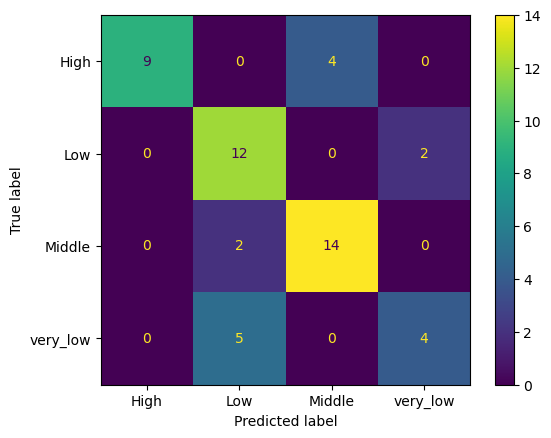

In [33]:
from sklearn.metrics import ConfusionMatrixDisplay

# Ensure 'model_pipeline' is your trained pipeline and 'X_test', 'y_test' are your test set features and labels
ConfusionMatrixDisplay.from_estimator(
    model_pipeline,  # Your pipeline that includes preprocessing and the classifier
    X_test,
    y_test,
    display_labels=model_pipeline.classes_,  # Optionally specify class names for a more informative display
    cmap='viridis',  # Optionally choose a colormap (e.g., 'viridis', 'plasma', 'inferno', 'magma', 'cividis')
    normalize=None  # Optionally normalize the confusion matrix ('true', 'pred', 'all', or None)
)

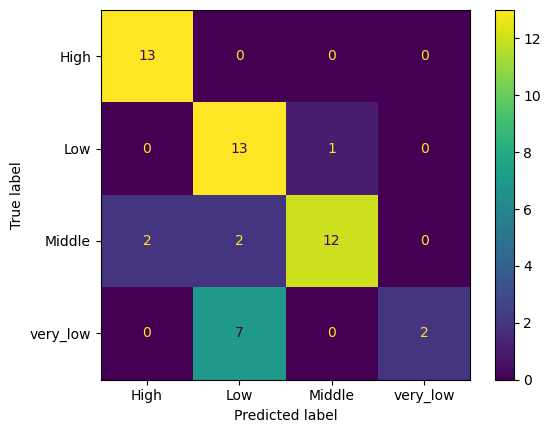

In [41]:
filtered_data_3 = filtered_data_1.drop([" UNS"], axis=1)

# Define the column transformer
preprocessor = make_column_transformer(
    (StandardScaler(), ['STG', 'SCG', "STR", "LPR", 'PEG']),
    verbose_feature_names_out=False
)

# Split the dataset into training and test sets with an 80-20 split
X_train, X_test, y_train, y_test = train_test_split(filtered_data_3, labels, test_size=0.2, random_state=42)

# Apply the preprocessor to the training and test data
# Note: This step is typically done inside a pipeline to prevent data leakage. Here it's shown separately for demonstration.
X_train_scaled = preprocessor.fit_transform(X_train)
X_test_scaled = preprocessor.transform(X_test)

# Specify the K-Nearest Neighbors classifier with 3 neighbors
knn_classifier = KNeighborsClassifier(n_neighbors=3)

# Create a pipeline with the preprocessor and the classifier
model_pipeline = make_pipeline(preprocessor, knn_classifier)

# Fit the model pipeline to the training data
model_pipeline.fit(X_train, y_train)

test_predictions = X_test.assign(
    predicted=model_pipeline.predict(X_test)
)

test_predictions['Actual UNS'] = y_test.reset_index(drop=True)

# Now, create the confusion matrix using the corrected labels
confusion_matrix = pd.crosstab(
    test_predictions['Actual UNS'],  # True labels
    test_predictions['predicted'],    # Predicted labels
    rownames=['Actual'], 
    colnames=['Predicted']
)

ConfusionMatrixDisplay.from_estimator(
    model_pipeline,  # Your pipeline that includes preprocessing and the classifier
    X_test,
    y_test,
    display_labels=model_pipeline.classes_,  # Optionally specify class names for a more informative display
    cmap='viridis',  # Optionally choose a colormap (e.g., 'viridis', 'plasma', 'inferno', 'magma', 'cividis')
    normalize=None  # Optionally normalize the confusion matrix ('true', 'pred', 'all', or None)
)

# 2. Cross-validation 

In [13]:
from sklearn.model_selection import cross_validate
import pandas as pd
# Perform cross-validation
X = data.drop(columns=[' UNS'])  #  target column 
y = data[' UNS']  # 'UNS' is the name of the target column

cv_scores = pd.DataFrame(
    cross_validate(
        estimator=model_pipeline,
        X=X,
        y=y,
        cv=5,  # Number of folds in cross-validation
        return_train_score=True,  # Whether to return the training scores
        scoring=['accuracy']  # Evaluation metrics, can be a list of multiple scoring metrics
    )
)

# Display the cross-validation scores
cv_scores

,fit_time,score_time,test_accuracy,train_accuracy
0,0.004674,0.006286,0.807692,0.902913
1,0.003660,0.004826,0.711538,0.878641
2,0.003540,0.004764,0.711538,0.917476
3,0.003590,0.004680,0.823529,0.917874
4,0.003462,0.004634,0.705882,0.913043


In [14]:
# Calculate the mean and standard error of the mean for the cross-validation scores
metrics = cv_scores.agg(['mean', 'sem'])

# Display the aggregated metrics
metrics


,fit_time,score_time,test_accuracy,train_accuracy
mean,0.003785,0.005038,0.752036,0.905989
sem,0.000225,0.000314,0.026095,0.007350


# 3. Parameter value selection

In [15]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for n_neighbors
param_grid = {
    "kneighborsclassifier__n_neighbors": range(2, 15, 1),  # Trying n_neighbors from 2 to 14
}

# Assuming 'preprocessor' has already been defined
# Create a new pipeline with the preprocessor and KNeighborsClassifier without specifying n_neighbors
tune_pipeline = make_pipeline(preprocessor, KNeighborsClassifier())

tune_pipeline

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  ['STG', 'SCG', 'STR', 'LPR',
                                                   'PEG'])],
                                   verbose_feature_names_out=False)),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [16]:
# Create a GridSearchCV object
grid_search = GridSearchCV(
    estimator=tune_pipeline,
    param_grid=param_grid,
    cv=5,  # Number of cross-validation folds
    scoring='accuracy'  # Scoring method
)

grid_search


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('standardscaler',
                                                                         StandardScaler(),
                                                                         ['STG',
                                                                          'SCG',
                                                                          'STR',
                                                                          'LPR',
                                                                          'PEG'])],
                                                          verbose_feature_names_out=False)),
                                       ('kneighborsclassifier',
                                        KNeighborsClassifier())]),
             param_grid={'kneighborsclassifier__n_neighbors': range(2, 15)},
             scoring='accuracy')

In [17]:
# Perform the grid search by fitting it to the data
knn_tune_grid = grid_search.fit(X, y)

# Extract the cross-validation results into a DataFrame
accuracies_grid = pd.DataFrame(knn_tune_grid.cv_results_)

# Display the grid search accuracies DataFrame
accuracies_grid


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_kneighborsclassifier__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.007890,0.008245,0.004825,0.000209,2,{'kneighborsclassifier__n_neighbors': 2},0.769231,0.826923,0.769231,0.784314,0.686275,0.767195,0.045644,2
1,0.003397,0.000010,0.004675,0.000061,3,{'kneighborsclassifier__n_neighbors': 3},0.807692,0.711538,0.711538,0.823529,0.705882,0.752036,0.052190,5
2,0.003371,0.000017,0.004668,0.000074,4,{'kneighborsclassifier__n_neighbors': 4},0.807692,0.884615,0.769231,0.745098,0.725490,0.786425,0.056232,1
3,0.003374,0.000016,0.004693,0.000064,5,{'kneighborsclassifier__n_neighbors': 5},0.769231,0.846154,0.692308,0.803922,0.666667,0.755656,0.067284,4
4,0.003371,0.000047,0.004692,0.000066,6,{'kneighborsclassifier__n_neighbors': 6},0.769231,0.826923,0.750000,0.784314,0.666667,0.759427,0.052848,3
5,0.003647,0.000364,0.004720,0.000056,7,{'kneighborsclassifier__n_neighbors': 7},0.711538,0.826923,0.730769,0.823529,0.647059,0.747964,0.068919,6
6,0.003456,0.000113,0.005152,0.000840,8,{'kneighborsclassifier__n_neighbors': 8},0.769231,0.807692,0.750000,0.784314,0.588235,0.739894,0.078145,8
7,0.003471,0.000047,0.004736,0.000098,9,{'kneighborsclassifier__n_neighbors': 9},0.615385,0.826923,0.730769,0.784314,0.607843,0.713047,0.088280,11
8,0.003367,0.000014,0.004772,0.000190,10,{'kneighborsclassifier__n_neighbors': 10},0.692308,0.865385,0.730769,0.803922,0.627451,0.743967,0.083373,7
9,0.003380,0.000044,0.004682,0.000031,11,{'kneighborsclassifier__n_neighbors': 11},0.557692,0.826923,0.711538,0.803922,0.549020,0.689819,0.117958,13


In [18]:
# Assuming 'accuracies_grid' contains the grid search cross-validation results
# Create a chart that plots the mean test score for each value of n_neighbors
accuracy_versus_k_grid = alt.Chart(accuracies_grid).mark_line(point=True).encode(
    x=alt.X("param_kneighborsclassifier__n_neighbors:N", title="Number of Neighbors", scale=alt.Scale(zero=False)),
    y=alt.Y("mean_test_score:Q", title="Mean Test Score", scale=alt.Scale(zero=False))
)

# Display the chart
accuracy_versus_k_grid

alt.Chart(...)

In [19]:
# Specify the K-Nearest Neighbors classifier with 4 neighbors
knn_classifier = KNeighborsClassifier(n_neighbors=4)

# Create a pipeline with the preprocessor and the classifier
model_pipeline = make_pipeline(preprocessor, knn_classifier)

# Fit the model pipeline to the training data
model_pipeline.fit(X_train, y_train)

test_predictions = X_test.assign(
    predicted=model_pipeline.predict(X_test)
)

# Evaluate the prediction accuracy of the model on the test set
prediction_accuracy = model_pipeline.score(X_test, y_test)

# Output the prediction accuracy
prediction_accuracy

0.7884615384615384

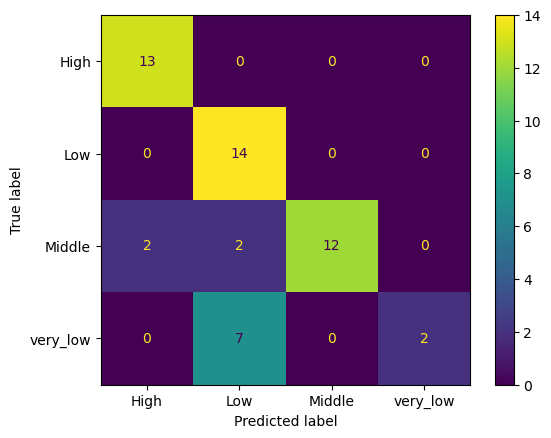

In [20]:
test_predictions['Actual UNS'] = y_test.reset_index(drop=True)

# Now, create the confusion matrix using the corrected labels
confusion_matrix = pd.crosstab(
    test_predictions['Actual UNS'],  # True labels
    test_predictions['predicted'],    # Predicted labels
    rownames=['Actual'], 
    colnames=['Predicted']
)
# Ensure 'model_pipeline' is your trained pipeline and 'X_test', 'y_test' are your test set features and labels
ConfusionMatrixDisplay.from_estimator(
    model_pipeline,  # Your pipeline that includes preprocessing and the classifier
    X_test,
    y_test,
    display_labels=model_pipeline.classes_,  # Optionally specify class names for a more informative display
    cmap='viridis',  # Optionally choose a colormap (e.g., 'viridis', 'plasma', 'inferno', 'magma', 'cividis')
    normalize=None  # Optionally normalize the confusion matrix ('true', 'pred', 'all', or None)
)